In [1]:
import numpy as np
import pandas as pd
import EA_funcs as eva
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange

In [2]:
benchmark_return = 0.14
benchmark_risk = 0.16

In [3]:
data = eva.all_data

returns = data.pct_change().dropna()
cumulative = (1 + returns).cumprod() - 1

final_returns = cumulative.iloc[-1]
top_performers = final_returns.sort_values(ascending=False)
top_performers = top_performers[top_performers>1].index
data = data.drop(columns=top_performers)

split = int(0.7 * len(data))
train_data = data[:split]
test_data = data[split:]

## Preliminary EA test

Here we simply evolve a population over a few generations using the set of stable assets without performing any parameter tuning.

In [4]:
test = eva.EA(train_data, max_risk=benchmark_risk)
test.run(50)
best = test.best_chrom

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/50 [00:00<?, ?it/s]

Expected return (train): 11.891%
Risk (train): 0.168%


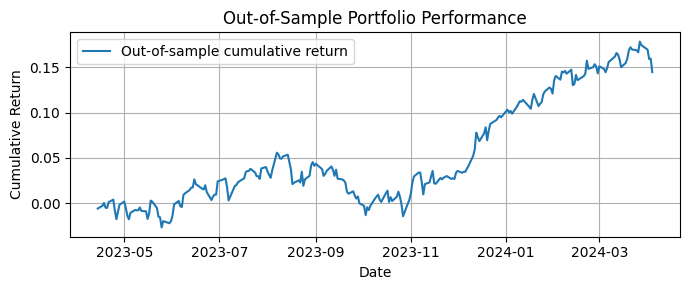

Actual return: 14.48%
Volatility during test: 0.1%


In [5]:
eva.test_portfolio_weights(best, train_data, test_data);

The following shows that constraints are mostly satisfied:

- All genes sum up to 1 for each chromosome, and in particular in the best solution.
- All genes except for one are below the maximum weight allowed. This indicates that asset must have been very strong, in order to survive despite penalization.
- There are no negative genes

In [6]:
print('sum of genes in best solution: ', best.sum())
print('sum of all genes in population: ', test.population[:,:-1].sum(),
                                                  f'(pop size={test.pop_size})')
print(f"Max gene weight violations in best portfolio: {(test.best_chrom > test.max_w).sum()}")
print(f"Max gene weight violations in population: {(test.population[:, :-1] > test.max_w).sum()}")
print(f"no negative weights in the population:", np.all(test.population>=0))

sum of genes in best solution:  0.9999999999999999
sum of all genes in population:  99.99999999999999 (pop size=100)
Max gene weight violations in best portfolio: 1
Max gene weight violations in population: 100
no negative weights in the population: True


We can also see that the population is quickly converging, which reinforces our election to use a uniform parent selection, limiting the selection pressure that could otherwise lead to premature convergence. Also, it can be appreciated that the mutation operator keeps introducing diversity in the population even in later stages of the evolution, which drives further improvements even if diversity is already low.

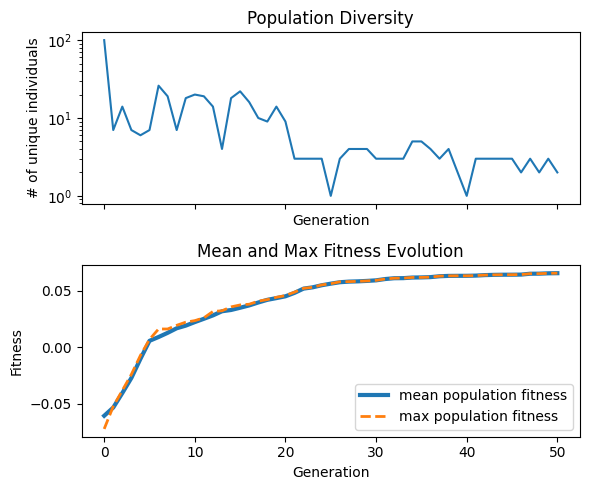

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(6, 5), sharex=True)
test.plot_diversity(ax=axs[0])
test.plot_fitness(ax=axs[1])
plt.tight_layout
plt.savefig('evolution.jpg')

### Performance

As for performance metrics, we can confirm this naive application isn't giving the greatest results, although not the worst either. At least the generated porfolios don't make us lose any money. 

#### MBF (mean best fitness)

In [8]:
best_returns, risks = eva.MBF(train_data, test_data, runs=20, max_risk=benchmark_risk, generations=25)

Finding MBF:   0%|          | 0/20 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Mean Return at the end of testing period: 0.16%
Mean Risk: 0.15%


#### AES (Average fitness Evaluations to Solution) + SR (Success Rate)

Only around 20% of the time does this un-tuned application of the EA surpass the VMEX benchmark.

Finding AES and SR:   0%|          | 0/50 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

AES: 3076.00
SR: 1.00


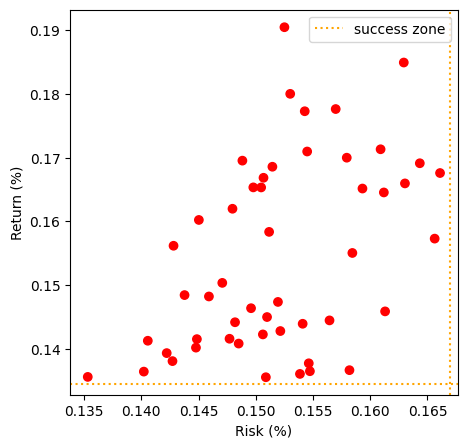

In [9]:
evals, returns, risks = eva.AES_SR(train_data, test_data, 
                                   solution=(benchmark_return, benchmark_risk), 
                                   runs=50, plot=True, max_risk=benchmark_risk)

# Parameter Selection

Next we perform a series of experiments to try and tune in the values for the main algorithm parameters. 

For this purpose we will start with exploring the effect of allowing for a larger vs. a smaller diversification, which is controlled by the parameter `w_max`: the maximum weight per asset, starting with $1/\text{\# of assets}$, which should return something close the equal weights porfolio.

In [13]:
# Define the range of max_w values to test
w_start = 1/(0.5 * test_data.shape[1])
ws = np.linspace(w_start, 0.2, 100)

# Compute test set daily returns
test_returns = test_data.pct_change().dropna()

# Compute training-set covariance matrix (for risk estimation)
cov_matrix = train_data.pct_change().dropna().cov()

returns = []
risks = []

# Loop over each max_w value
for w in tqdm(ws, desc="Sweeping max_w"):
    # Initialize and run the EA on training data
    ea = eva.EA(train_data, max_w=w)
    ea.run(25)
    
    # Compute out-of-sample return (realized return on test set)
    actual_return = 100 * ea.test_returns(test_data, ea.best_chrom)[0]
    
    # Compute in-sample risk using training covariance matrix
    model_risk = 100 * ea.volatility(ea.best_chrom)

    # Store both
    returns.append(actual_return)
    risks.append(model_risk)

Sweeping max_w:   0%|          | 0/100 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/25 [00:00<?, ?it/s]

We can clearly see that allowing for higher weights per asset resulted in riskier portfolios, which in general didn't perform too well when put to the test against future, unseen, data. 

In contrast, portfolio with a smaller allowed maximum weight per asset had a smaller training risk, and performed a lot better on the training set.

This confirms the maxim that diversification is usually the way to go. With this in mind, going forward we'll be using a w_max of 0.05.

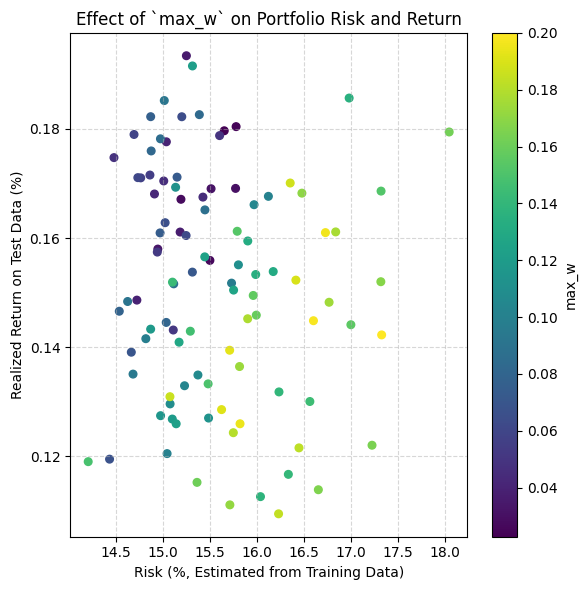

In [14]:
# Plot risk-return points, colored by max_w
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(risks, returns, c=ws, cmap='viridis', s=30)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('max_w')

ax.set_title(r'Effect of `max_w` on Portfolio Risk and Return')
ax.set_xlabel('Risk (%, Estimated from Training Data)')
ax.set_ylabel('Realized Return on Test Data (%)')
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("max_w__effect.jpg")

# Returns for different $\delta$ (risk vs. returns prioritization)

########################################

ADD OUT OF SAMPLE RETURNS AND PLOT THOSE

########################################

Testing different $\delta$s:   0%|          | 0/7 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/10 [00:00<?, ?it/s]

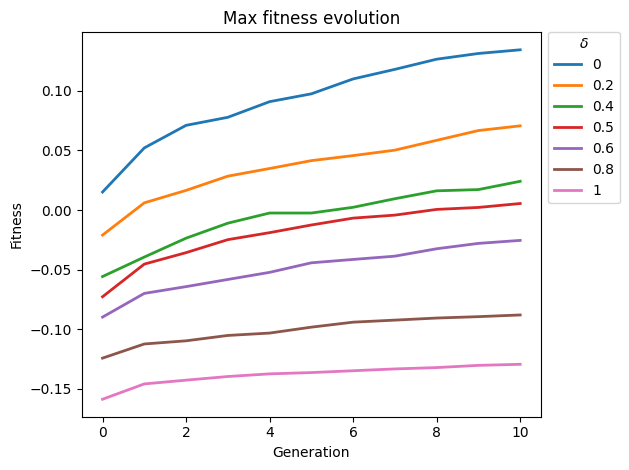

In [17]:
ks = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
for k in tqdm(ks, desc=r"Testing different $\delta$s"):
    ea = eva.EA(train_data, delta=k, max_w=0.05, max_risk=benchmark_risk)
    ea.run(10)
    ea.plot_max_fitness(label=f'{k}')
plt.legend(bbox_to_anchor=(1, 1.02), title=r'$\delta$')

plt.title('Max fitness evolution')
plt.xlabel('Generation')
plt.tight_layout()
#plt.savefig('fitness_evolution_vs_k.jpg')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))
ks = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
for k in tqdm(ks):
    ea = eva.EA(train_data, delta=k, max_w=0.07)
    returns = []
    risks = []
    for i in range(50):
        ea.run(1)
        returns.append(ea.test_returns(test_data, ea.best_chrom)[0])
        risks.append(100 * ea.volatility(ea.best_chrom))
    ax[0].plot(returns)
    ax[1].plot(risks, label=k)
plt.legend(bbox_to_anchor=(1, 1.02), title=r'$\delta$')
ax[0].set_ylabel('Retorno Esperado')
ax[1].set_ylabel('Riesgo')
ax[0].set_xlabel('Generación')
ax[1].set_xlabel('Generación')
ax[0].set_title('Evolución de Retorno Esperado')
ax[1].set_title('Evolución del Riesgo')
plt.tight_layout()
#plt.savefig('Evolucion_de_retorno_segun_delta.jpg')

  0%|          | 0/7 [00:00<?, ?it/s]

Initializing population:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

Evolving population:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ks = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
returns = []
risks = []

for k in tqdm(ks):
    ea = eva.EA(train_data, delta=k, max_w=0.025, pop_size=1000, lambda_=6000)
    ea.run(10)
    actual_return, cumulative = ea.test_returns(test_data, ea.best_chrom)
    risk = 100 * ea.volatility(ea.best_chrom)
    returns.append(actual_return)
    risks.append(risk)

In [ ]:
plt.plot(returns)

plt.legend(bbox_to_anchor=(1, 1.02), title=r'$\delta$')

plt.title('Max fitness evolution')
plt.xlabel('Generation')
plt.tight_layout()
plt.savefig('fitness_evolution_vs_k.jpg')

### MBF para distintos $\delta$.

In [ ]:
ks = np.linspace(0, 1, 11)
mbfs = np.empty(ks.shape)
for i, k in enumerate(ks):
    mbf = MBF(EA, best100, runs=5, delta=k, max_w=0.07).mean()
    mbfs[i] = mbf

plt.plot(ks, mbfs)
plt.xlabel(r'$\delta$')
plt.ylabel('MBF')
plt.title('MBF Según la Tolerancia al Riesgo')
plt.savefig('MBF_vs_delta.jpg')
files.download("MBF_vs_delta.jpg")

### Fitness vs. Riesgo para distintas k

In [ ]:
ks = np.linspace(0, 1, 11)
returns = np.empty(ks.shape)
risks = np.empty(ks.shape)
for i, k in enumerate(ks):
    ea = EA(best100, rho=k, max_w=0.07)
    ea.run(50)
    best = ea.population[np.argmax(ea.pop_fitness)][:-1]
    _, r, risk = ea.fitness(best)
    returns[i] = r
    risks[i] = risk

plt.plot(risks, returns, ':')
sns.scatterplot(x=risks, y=returns, hue=ks, palette='viridis', s=80)
plt.xlabel('Riesgo')
plt.ylabel('Retorno Esperado')
plt.title('Retorno Esperado vs. Riesgo de la Cartera \npara Distintos Valores de $k$')
plt.savefig('fit_vs_risk_vs_k.jpg')
files.download('fit_vs_risk_vs_k.jpg')

### Evolución de diversidad para distintas tasas de mutación ($p_m$)

In [ ]:
pm = [0.0001, 0.005, 0.01, 0.02, 0.05, 0.2]

for i, p in enumerate(pm):
    ea = EA(best100, max_w=0.07, p_m = p)
    ea.run(50)
    fit = ea.max_fit_history
    gens = range(len(fit))
    plt.plot(gens, fit, label=p)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.legend(bbox_to_anchor=(1, 1.02), title=r'$p_m$')
plt.suptitle('Fitness para Distintas Tasas de Mutación')
plt.tight_layout()
plt.savefig('fitness_vs_pm.jpg')
files.download('fitness_vs_pm.jpg')

# Pruebas de Robustez

### Respecto a diferentes activos

In [ ]:
fits = asset_robustness(data=all_data, sample_size=100, pop_size=1000,
                        lambda_=6000, generations=50, max_w=0.07, p_m=0.05)
plt.title('Prueba de Robustez para Distintos Grupos de Activos')
plt.xlabel('Generación')
plt.tight_layout()
plt.savefig('asset_robustness.jpg')
files.download('asset_robustness.jpg')
fits

### Respecto a distintos periodos de tiempo

In [ ]:
fits = time_robustness(data=all_data, periods=6, pop_size=1000,
                        lambda_=6000, generations=50, max_w=0.07, p_m=0.05)
plt.title('Prueba de Robustez para Distintos Periodos de Tiempo')
plt.xlabel('Generación')
plt.tight_layout()
plt.savefig('time_robustness.jpg')
files.download('time_robustness.jpg')
fits

In [ ]:
best_fits = []
ps = [10, 25, 50, 100, 250, 500, 1000]
for p in ps:
    ea = EA(best100, pop_size=p, lambda_=6*p, p_m=0.05, max_w=0.07,
            testing=False)
    ea.run(int(100/np.log10(p)))
    print(p, 'done')
    best_fits.append(ea.pop_fitness.max())
plt.plot(ps, best_fits)
plt.title(r'Fitness Máximo vs. $\mu$')
plt.xscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel('Fitness')
plt.tight_layout()
plt.savefig('fit_vs_pop_size.jpg')
files.download('fit_vs_pop_size.jpg')

In [ ]:
fits1, returns1, risks1 = MBF(EA, best100, p_m=0.05, max_w=0.07, pop_size=1000,
                           delta=0.51, lambda_=6000, runs=10, generations=50)

In [ ]:
returns1.mean(), returns1.std()

In [ ]:
risks1.mean(), risks1.std()

In [ ]:
evals2, returns2, risks2 = AES_SR(EA, best100, solution=0.208, max_risk=0.181,
                               max_gens=50, p_m=0.05, max_w=0.07, delta=0.51,
                               pop_size=1000, lambda_=6000, runs=30)

In [ ]:
plt.scatter(risks2, returns2)
plt.xlabel('Riesgo')
plt.ylabel('Retorno Esperado')
plt.title('Resultados de la Prueba de Desempeño')
plt.tight_layout()
plt.savefig('resultados.jpg')
files.download('resultados.jpg')

In [ ]:
test = EA(best100, p_m=0.05, max_w=0.07, pop_size=2000, lambda_=12000, delta=0.51)
best = test.population[np.argmax(test.pop_fitness)][:-1]
test.fitness(best)

In [ ]:
test.run(1)

In [ ]:
best = test.population[np.argmax(test.pop_fitness)][:-1]
test.fitness(best)

In [ ]:
test.plot_fitness()
plt.xlabel('Generación')
plt.title('Fitness Medio y Máximo por Generación')
plt.legend(labels=['Fitness promedio', 'Fitness Máximo'])
plt.tight_layout()
plt.savefig('ejemplo.jpg')
files.download('ejemplo.jpg')

In [ ]:
test.plot_diversity()
plt.yscale('log')
plt.xlabel('Generación')
plt.ylabel('# de individuos distintos')
plt.title('Evolución de la Diversidad de la Población')
plt.tight_layout()
plt.savefig('diversidad.jpg')
files.download('diversidad.jpg')

In [ ]:
test.portfolio().T

In [ ]:
best100.columns